**Library Imports**

In [1]:
import pandas as pd
import io
import requests
import numpy as np
import os
import seaborn as sns

from scipy.stats import zscore

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

from matplotlib import pyplot
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import LabelEncoder
from IPython.display import display

from imblearn.over_sampling import SMOTE

import tensorflow as tf

Panda Preferences

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

Read CSV

In [3]:
df_train = pd.read_csv("../../Datasets/Farm-Flow_Train.csv")
display(df_train)

,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,bwd_pkts_payload.tot,bwd_pkts_payload.avg,flow_pkts_payload.tot,flow_pkts_payload.avg,fwd_iat.tot,fwd_iat.avg,bwd_iat.tot,bwd_iat.avg,flow_iat.tot,flow_iat.avg,traffic,pkts_difference,data_pkts_difference,is_attack
0,0.0,-0.067841,0.005959,0.881829,1.503112,0.000026,0.000041,0.000038,0.194444,192,1.566169,1.478170,256,2.712843,4.268354,-0.000945,-0.000945,1.589631,6.736335,-0.000945,-0.000945,0.829308,0.245222,1.220854,2.096534,0.824683,0.006424,HTTP_Flood,-0.094869,0.139609,1
1,0.0,-0.067841,-0.237735,-0.500297,-0.536844,0.000000,0.000000,0.000000,0.000000,24,0.655956,0.605343,0,-0.444625,-0.434283,-0.000945,-0.000945,-0.019102,-0.052290,-0.000945,-0.000945,-0.159412,-0.168388,-0.076153,-0.096974,-0.163665,-0.167367,Port_Scanning,0.007982,-0.013989,1
2,0.0,-0.067841,-0.393700,-0.500297,-0.536844,0.000000,0.000000,0.000000,0.000000,8,-1.164469,-1.140311,0,-0.444625,-0.434283,-0.000945,-0.000945,-0.019102,-0.052290,-0.000945,-0.000945,-0.159412,-0.168388,-0.076153,-0.096974,-0.163665,-0.167367,UDP_Flood,0.007982,-0.013989,1
3,0.0,-0.067841,-0.393700,-0.500297,-0.536844,0.000000,0.000000,0.000000,0.000000,8,-1.164469,-1.140311,0,-0.444625,-0.434283,-0.000945,-0.000945,-0.019102,-0.052290,-0.000945,-0.000945,-0.159412,-0.168388,-0.076153,-0.096974,-0.163665,-0.167367,UDP_Flood,0.007982,-0.013989,1
4,0.0,-0.067841,-0.393700,-0.500297,-0.536844,0.000000,0.000000,0.000000,0.000000,8,-1.164469,-1.140311,0,-0.444625,-0.434283,-0.000945,-0.000945,-0.019102,-0.052290,-0.000945,-0.000945,-0.159412,-0.168388,-0.076153,-0.096974,-0.163665,-0.167367,UDP_Flood,0.007982,-0.013989,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839594,0.0,-0.067841,-0.276726,-0.500297,-0.536844,0.000000,0.000000,0.000000,0.000000,20,0.200850,0.168930,0,-0.444625,-0.434283,-0.000945,-0.000945,-0.019102,-0.052290,-0.000945,-0.000945,-0.159412,-0.168388,-0.076153,-0.096974,-0.163665,-0.167367,TCP_Flood,0.007982,-0.013989,1
839595,0.0,-0.067841,-0.276726,-0.500297,-0.536844,0.000000,0.000000,0.000000,0.000000,20,0.200850,0.168930,0,-0.444625,-0.434283,-0.000945,-0.000945,-0.019102,-0.052290,-0.000945,-0.000945,-0.159412,-0.168388,-0.076153,-0.096974,-0.163665,-0.167367,TCP_Flood,0.007982,-0.013989,1
839596,0.0,-0.067841,-0.276726,-0.500297,-0.536844,0.000000,0.000000,0.000000,0.000000,20,0.200850,0.168930,0,-0.444625,-0.434283,-0.000945,-0.000945,-0.019102,-0.052290,-0.000945,-0.000945,-0.159412,-0.168388,-0.076153,-0.096974,-0.163665,-0.167367,ICMP_Flood,0.007982,-0.013989,1
839597,0.0,-0.067841,-0.393700,-0.500297,-0.536844,0.000000,0.000000,0.000000,0.000000,8,-1.164469,-1.140311,0,-0.444625,-0.434283,-0.000945,-0.000945,-0.019102,-0.052290,-0.000945,-0.000945,-0.159412,-0.168388,-0.076153,-0.096974,-0.163665,-0.167367,UDP_Flood,0.007982,-0.013989,1


In [4]:
df_test = pd.read_csv("../../Datasets/Farm-Flow_Test.csv")
display(df_test)

,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,fwd_header_size_max,bwd_header_size_tot,bwd_header_size_min,bwd_header_size_max,fwd_pkts_payload.tot,fwd_pkts_payload.avg,bwd_pkts_payload.tot,bwd_pkts_payload.avg,flow_pkts_payload.tot,flow_pkts_payload.avg,fwd_iat.tot,fwd_iat.avg,bwd_iat.tot,bwd_iat.avg,flow_iat.tot,flow_iat.avg,traffic,pkts_difference,data_pkts_difference,is_attack
0,0.0,-0.067841,1.692323,0.881829,1.503112,0.000085,0.000116,0.000116,0.166667,456,1.566169,2.350997,456,2.712843,3.183130,-0.000945,-0.000945,1.589631,3.342022,-0.000945,-0.000945,0.545786,-0.054924,0.848904,0.625086,0.541274,-0.112275,HTTP_Flood,-0.043444,0.446804,1
1,0.0,-0.067841,-0.276726,0.881829,1.189272,0.730159,0.992063,0.992063,0.166667,20,0.200850,0.168930,24,1.923476,1.736165,-0.000945,-0.000945,-0.019102,-0.052290,-0.000945,-0.000945,-0.159412,-0.168388,-0.076153,-0.096974,-0.163659,-0.167355,TCP_Flood,-0.043444,-0.013989,1
2,0.0,-0.067841,-0.276726,-0.500297,-0.536844,0.000000,0.000000,0.000000,0.000000,20,0.200850,0.168930,0,-0.444625,-0.434283,-0.000945,-0.000945,-0.019102,-0.052290,-0.000945,-0.000945,-0.159412,-0.168388,-0.076153,-0.096974,-0.163665,-0.167367,TCP_Flood,0.007982,-0.013989,1
3,0.0,-0.067841,-0.276726,-0.500297,-0.536844,0.000000,0.000000,0.000000,0.000000,20,0.200850,0.168930,0,-0.444625,-0.434283,-0.000945,-0.000945,-0.019102,-0.052290,-0.000945,-0.000945,-0.159412,-0.168388,-0.076153,-0.096974,-0.163665,-0.167367,TCP_Flood,0.007982,-0.013989,1
4,0.0,-0.067841,-0.393700,-0.500297,-0.536844,0.000000,0.000000,0.000000,0.000000,8,-1.164469,-1.140311,0,-0.444625,-0.434283,-0.000945,-0.000945,-0.019102,-0.052290,-0.000945,-0.000945,-0.159412,-0.168388,-0.076153,-0.096974,-0.163665,-0.167367,UDP_Flood,0.007982,-0.013989,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279862,0.0,-0.067841,-0.237735,-0.500297,-0.536844,0.000000,0.000000,0.000000,0.000000,24,0.655956,0.605343,0,-0.444625,-0.434283,-0.000945,-0.000945,-0.019102,-0.052290,-0.000945,-0.000945,-0.159412,-0.168388,-0.076153,-0.096974,-0.163665,-0.167367,Port_Scanning,0.007982,-0.013989,1
279863,0.0,-0.067841,-0.393700,-0.500297,-0.536844,0.000000,0.000000,0.000000,0.000000,8,-1.164469,-1.140311,0,-0.444625,-0.434283,-0.000945,-0.000945,-0.019102,-0.052290,-0.000945,-0.000945,-0.159412,-0.168388,-0.076153,-0.096974,-0.163665,-0.167367,UDP_Flood,0.007982,-0.013989,1
279864,0.0,-0.067841,-0.276726,-0.500297,-0.536844,0.000000,0.000000,0.000000,0.000000,20,0.200850,0.168930,0,-0.444625,-0.434283,-0.000945,-0.000945,-0.019102,-0.052290,-0.000945,-0.000945,-0.159412,-0.168388,-0.076153,-0.096974,-0.163665,-0.167367,TCP_Flood,0.007982,-0.013989,1
279865,0.0,-0.067841,-0.276726,-0.500297,-0.536844,0.000000,0.000000,0.000000,0.000000,20,0.200850,0.168930,0,-0.444625,-0.434283,-0.000945,-0.000945,-0.019102,-0.052290,-0.000945,-0.000945,-0.159412,-0.168388,-0.076153,-0.096974,-0.163665,-0.167367,MQTT_Flood,0.007982,-0.013989,1


In [5]:
df_train.groupby('traffic')['traffic'].count()

traffic
Arp_Spoofing       2007
BotNet_DDOS          35
HTTP_Flood        84549
ICMP_Flood        57569
MQTT_Flood        93349
Normal             5321
Port_Scanning     94909
TCP_Flood        279623
UDP_Flood        222237
Name: traffic, dtype: int64

In [6]:
df_test.groupby('traffic')['traffic'].count()

traffic
Arp_Spoofing       685
BotNet_DDOS         13
HTTP_Flood       28412
ICMP_Flood       19246
MQTT_Flood       30639
Normal            1774
Port_Scanning    31664
TCP_Flood        93123
UDP_Flood        74311
Name: traffic, dtype: int64

---------------------------------------

**Create Model & Train Model**

In [7]:
df_train = df_train.drop('is_attack', axis=1)
df_test = df_test.drop('is_attack', axis=1)

In [8]:
x_columns = df_train.columns.drop('traffic')

le = LabelEncoder()
le.fit(df_train["traffic"].values)

x = df_train[x_columns].values
y = df_train["traffic"].values
y = le.transform(y)

In [9]:
x_columns_val = df_test.columns.drop('traffic')

le = LabelEncoder()
le.fit(df_test["traffic"].values)

x_val = df_test[x_columns].values
y_val = df_test["traffic"].values
y_val = le.transform(y_val)

In [10]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [11]:
x_test.shape,y_test.shape

((209900, 29), (209900,))

In [12]:
x_train.shape,y_train.shape

((629699, 29), (629699,))

In [13]:
x_val.shape, y_val.shape

((279867, 29), (279867,))

In [14]:
# Usage of ExtraTreesClassifier for feature selection
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2)
extra_tree_forest.fit(x, y)
feature_importance = extra_tree_forest.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in  extra_tree_forest.estimators_], axis = 0)

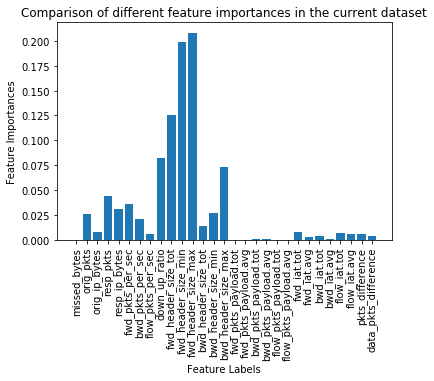

In [15]:
# Plot for the ExtraTreesClassifier output
plot.bar(x_columns, feature_importance_normalized)
plot.xlabel('Feature Labels')
plot.ylabel('Feature Importances')
plot.title('Comparison of different feature importances in the current dataset')
plot.xticks(rotation = 90)

# Plot size
plot.rcParams["figure.figsize"] = (70, 40)

plot.show()

In [16]:
# Define the model
model = Sequential()
model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor="loss",factor=0.5,mode="min",patience=10,verbose=1,min_lr=1e-7)
checkpoint = ModelCheckpoint('DNN_Best-Model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=300, batch_size=512, callbacks=[monitor, checkpoint])

Train on 629699 samples, validate on 209900 samples
Epoch 1/300
629699/629699 [==============================] - 4s 6us/sample - loss: 1.2438 - accuracy: 0.6469 - val_loss: 0.8175 - val_accuracy: 0.7258
Epoch 2/300
629699/629699 [==============================] - 3s 5us/sample - loss: 0.8003 - accuracy: 0.7645 - val_loss: 0.9311 - val_accuracy: 0.7279
Epoch 3/300
629699/629699 [==============================] - 3s 5us/sample - loss: 0.6974 - accuracy: 0.7904 - val_loss: 0.7283 - val_accuracy: 0.7373
Epoch 4/300
629699/629699 [==============================] - 3s 5us/sample - loss: 0.6723 - accuracy: 0.7953 - val_loss: 0.6524 - val_accuracy: 0.7384
Epoch 5/300
629699/629699 [==============================] - 3s 5us/sample - loss: 0.6413 - accuracy: 0.8028 - val_loss: 0.5240 - val_accuracy: 0.8254
Epoch 6/300
629699/629699 [==============================] - 3s 5us/sample - loss: 0.6227 - accuracy: 0.8067 - val_loss: 0.5745 - val_accuracy: 0.8469
Epoch 7/300
629699/629699 [===============

629699/629699 [==============================] - 3s 5us/sample - loss: 0.7322 - accuracy: 0.7662 - val_loss: 0.4978 - val_accuracy: 0.8313
Epoch 52/300
629699/629699 [==============================] - 3s 5us/sample - loss: 0.7343 - accuracy: 0.7648 - val_loss: 0.4953 - val_accuracy: 0.8313
Epoch 53/300
629699/629699 [==============================] - 4s 6us/sample - loss: 0.7327 - accuracy: 0.7651 - val_loss: 0.4992 - val_accuracy: 0.8313
Epoch 54/300
629699/629699 [==============================] - 7s 11us/sample - loss: 0.7300 - accuracy: 0.7661 - val_loss: 0.4882 - val_accuracy: 0.8312
Epoch 55/300
629699/629699 [==============================] - 18s 28us/sample - loss: 0.7339 - accuracy: 0.7647 - val_loss: 0.4939 - val_accuracy: 0.8423
Epoch 56/300
629699/629699 [==============================] - 18s 28us/sample - loss: 0.7701 - accuracy: 0.7547 - val_loss: 0.5038 - val_accuracy: 0.8469
Epoch 57/300
629248/629699 [============================>.] - ETA: 0s - loss: 0.7470 - accuracy:

629699/629699 [==============================] - 3s 5us/sample - loss: 0.7223 - accuracy: 0.7674 - val_loss: 0.4932 - val_accuracy: 0.8425
Epoch 100/300
629699/629699 [==============================] - 3s 5us/sample - loss: 0.7223 - accuracy: 0.7675 - val_loss: 0.4972 - val_accuracy: 0.8425
Epoch 101/300
629699/629699 [==============================] - 3s 5us/sample - loss: 0.7227 - accuracy: 0.7670 - val_loss: 0.4843 - val_accuracy: 0.8433
Epoch 102/300
629699/629699 [==============================] - 3s 5us/sample - loss: 0.7226 - accuracy: 0.7677 - val_loss: 0.5053 - val_accuracy: 0.8313
Epoch 103/300
629699/629699 [==============================] - 3s 5us/sample - loss: 0.7226 - accuracy: 0.7674 - val_loss: 0.5104 - val_accuracy: 0.8425
Epoch 104/300
629699/629699 [==============================] - 3s 6us/sample - loss: 0.7225 - accuracy: 0.7676 - val_loss: 0.5123 - val_accuracy: 0.8320
Epoch 105/300
629699/629699 [==============================] - 9s 15us/sample - loss: 0.7217 - a

Epoch 148/300
629699/629699 [==============================] - 3s 5us/sample - loss: 0.7227 - accuracy: 0.7673 - val_loss: 0.4841 - val_accuracy: 0.8429
Epoch 149/300
629699/629699 [==============================] - 3s 5us/sample - loss: 0.7207 - accuracy: 0.7682 - val_loss: 0.4907 - val_accuracy: 0.8424
Epoch 150/300
629699/629699 [==============================] - 3s 5us/sample - loss: 0.7214 - accuracy: 0.7680 - val_loss: 0.4999 - val_accuracy: 0.8314
Epoch 151/300
629699/629699 [==============================] - 3s 5us/sample - loss: 0.7210 - accuracy: 0.7679 - val_loss: 0.5080 - val_accuracy: 0.8313
Epoch 152/300
629699/629699 [==============================] - 3s 5us/sample - loss: 0.7209 - accuracy: 0.7686 - val_loss: 0.4935 - val_accuracy: 0.8425
Epoch 153/300
629699/629699 [==============================] - 3s 5us/sample - loss: 0.7219 - accuracy: 0.7678 - val_loss: 0.4874 - val_accuracy: 0.8424
Epoch 154/300
629699/629699 [==============================] - 4s 6us/sample - los

618496/629699 [============================>.] - ETA: 0s - loss: 0.7227 - accuracy: 0.7676
Epoch 00197: ReduceLROnPlateau reducing learning rate to 1e-07.
629699/629699 [==============================] - 3s 5us/sample - loss: 0.7228 - accuracy: 0.7676 - val_loss: 0.4883 - val_accuracy: 0.8425
Epoch 198/300
629699/629699 [==============================] - 3s 5us/sample - loss: 0.7208 - accuracy: 0.7679 - val_loss: 0.4994 - val_accuracy: 0.8424
Epoch 199/300
629699/629699 [==============================] - 3s 5us/sample - loss: 0.7213 - accuracy: 0.7678 - val_loss: 0.5081 - val_accuracy: 0.8315
Epoch 200/300
629699/629699 [==============================] - 3s 5us/sample - loss: 0.7225 - accuracy: 0.7678 - val_loss: 0.4859 - val_accuracy: 0.8431
Epoch 201/300
629699/629699 [==============================] - 3s 5us/sample - loss: 0.7219 - accuracy: 0.7680 - val_loss: 0.5039 - val_accuracy: 0.8312
Epoch 202/300
629699/629699 [==============================] - 3s 5us/sample - loss: 0.7210 - 

629699/629699 [==============================] - 18s 29us/sample - loss: 0.7214 - accuracy: 0.7681 - val_loss: 0.4815 - val_accuracy: 0.8425
Epoch 246/300
629699/629699 [==============================] - 18s 29us/sample - loss: 0.7224 - accuracy: 0.7680 - val_loss: 0.5133 - val_accuracy: 0.8313
Epoch 247/300
627200/629699 [============================>.] - ETA: 0s - loss: 0.7214 - accuracy: 0.7681
Epoch 00247: ReduceLROnPlateau reducing learning rate to 1e-07.
629699/629699 [==============================] - 18s 28us/sample - loss: 0.7214 - accuracy: 0.7681 - val_loss: 0.4860 - val_accuracy: 0.8429
Epoch 248/300
629699/629699 [==============================] - 18s 28us/sample - loss: 0.7199 - accuracy: 0.7683 - val_loss: 0.5013 - val_accuracy: 0.8429
Epoch 249/300
629699/629699 [==============================] - 12s 19us/sample - loss: 0.7215 - accuracy: 0.7678 - val_loss: 0.4953 - val_accuracy: 0.8425
Epoch 250/300
629699/629699 [==============================] - 4s 7us/sample - loss:

629699/629699 [==============================] - 10s 15us/sample - loss: 0.7204 - accuracy: 0.7684 - val_loss: 0.4940 - val_accuracy: 0.8321
Epoch 294/300
629699/629699 [==============================] - 4s 6us/sample - loss: 0.7220 - accuracy: 0.7676 - val_loss: 0.4851 - val_accuracy: 0.8425
Epoch 295/300
629699/629699 [==============================] - 4s 6us/sample - loss: 0.7220 - accuracy: 0.7679 - val_loss: 0.4813 - val_accuracy: 0.8425
Epoch 296/300
629699/629699 [==============================] - 4s 6us/sample - loss: 0.7208 - accuracy: 0.7684 - val_loss: 0.4894 - val_accuracy: 0.8425
Epoch 297/300
619008/629699 [============================>.] - ETA: 0s - loss: 0.7197 - accuracy: 0.7684
Epoch 00297: ReduceLROnPlateau reducing learning rate to 1e-07.
629699/629699 [==============================] - 3s 6us/sample - loss: 0.7196 - accuracy: 0.7685 - val_loss: 0.4928 - val_accuracy: 0.8425
Epoch 298/300
629699/629699 [==============================] - 4s 6us/sample - loss: 0.7216 

In [ ]:
# Load the best saved model
best_model = load_model('DNN_Best-Model.h5')

# Evaluate the best saved model
score = best_model.evaluate(x_val, y_val)
print('')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

125248/279867 [============>.................] - ETA: 18s - loss: 0.4716 - accuracy: 0.8444

In [ ]:
fig, ax = plt.subplots(figsize=(20, 16))

ax.plot(history.history['loss'], label='train')
ax.plot(history.history['val_loss'], label='test')
ax.set_title('Model Loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='upper right')
plt.show()

-------------------------------------

## Results

In [ ]:
pred = model.predict(x_val)

In [ ]:
import numpy as np

# Random state definition
random_state=42
np.random.seed(random_state)

In [ ]:
from sklearn import metrics

# Metrics for the classification
def compute_metrics(pred, y_val):
    predict_classes = np.argmax(pred, axis = 1)
    expected_classes = np.argmax(y_val, axis = 1)
    
    correct = metrics.accuracy_score(expected_classes, predict_classes)
    print(f"Accuracy: {correct}")
    
    recall = metrics.recall_score(expected_classes, predict_classes, average = 'weighted')    
    print(f"Recall: {recall}")
       
    precision = metrics.precision_score(expected_classes, predict_classes, average = 'weighted')
    print(f"Precision: {precision}")
    
    f1score = metrics.f1_score(expected_classes, predict_classes, average = 'weighted')
    print(f"F1-Score: {f1score}")

In [ ]:
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

def extra_tree_classifier(x_train, y_train, x_columns):
    # Usage of ExtraTreesClassifier for feature selection
    extra_tree_forest = ExtraTreesClassifier(n_estimators=5, criterion='entropy', max_features=2, random_state=random_state)
    extra_tree_forest.fit(x_train, y_train)
    feature_importances = extra_tree_forest.feature_importances_
    feature_importance_normalized = np.std([tree.feature_importances_ for tree in  extra_tree_forest.estimators_], axis = 0)

    # Plot the feature importances
    plt.rcParams["figure.figsize"] = (70, 40)
    plt.bar(x_columns, feature_importance_normalized, align='center')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Importance')
    plt.title('Comparison of different feature importances in the current dataset')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

ATTACKS = [
    'Arp Spoofing', 'BotNet DDOS', 
    'HTTP Flood', 'ICMP Flood', 
    'MQTT Flood', 'Normal', 
    'Port Scanning', 'TCP Flood', 
    'UDP Flood'
]
    
def conf_matrix(y_test, prediction, array_dimension = 2):
    if (array_dimension == 2):
        predict_classes = np.argmax(prediction, axis = 1)
        expected_classes = np.argmax(y_test, axis = 1)
    elif (array_dimension == 1):
        predict_classes = prediction
        expected_classes = y_test
    
    cm = confusion_matrix(expected_classes, predict_classes)
    cmd = ConfusionMatrixDisplay(cm, display_labels=ATTACKS)

    # Plot size
    fig, ax = plt.subplots(figsize=(11,11))
    
    cmd.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
    
    # Add axis labels and rotate them
    ax.set_xlabel('Predicted labels', rotation=0, labelpad=20, fontsize=11)
    ax.set_ylabel('True labels', rotation=90, labelpad=20, fontsize=11)

    ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
    ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
    ax.set_xticklabels(ATTACKS)
    ax.set_yticklabels(ATTACKS)
        
    ax.tick_params(axis='x', pad=35)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='center', va='center')
    ax.tick_params(axis='y', pad=35)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=40, ha='center', va='center')
    
    # Adjust colorbar size
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=11)  # Adjust the font size of colorbar labels
    cax = fig.add_axes([ax.get_position().x1+0.03,ax.get_position().y0,0.02,ax.get_position().height])
    plt.colorbar(cmd.im_, cax=cax)

In [ ]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=False):
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshowac(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
print(f'[METRICS] Decision Tree Classifier')
compute_metrics(y_val, pred)

print(f'\n[CMATRIX] Decision Tree Confusion Matrix')
conf_matrix(y_val, pred, 1)